In [386]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [387]:
df = pd.read_excel("data/TABUFAIRUZ8 EXCEL.xlsx", index_col="ID")
df.head()

,FVF,Q,Refpres,Thicknes,Visc,BHP,K,Slope,DPs,Skin
ID,,,,,,,,,,
1,1.21,2500.0000,6009.0000,23.000000,0.920000,5222.65230,86.631000,374.397590,0.183809,0.826446
2,1.11,1842.9774,6466.8453,35.700000,0.606981,6155.14840,103.212750,512.302801,0.048343,0.900901
3,1.01,3136.1019,5579.5585,24.592453,1.188491,4461.74560,70.775774,245.047741,0.340989,0.990099
4,0.85,2735.8491,6978.7415,24.975472,0.708113,6278.17240,98.347208,666.488404,0.125591,1.176471
5,1.73,3043.7358,6364.4660,29.954717,1.694151,5897.71905,95.103509,481.465663,0.288229,0.578035


In [388]:
df.columns

Index(['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'BHP', 'K', 'Slope', 'DPs',
       'Skin'],
      dtype='object')

In [389]:
df.drop(columns = (['BHP', 'DPs']), inplace = True)

In [390]:
df.head()

,FVF,Q,Refpres,Thicknes,Visc,K,Slope,Skin
ID,,,,,,,,
1,1.21,2500.0000,6009.0000,23.000000,0.920000,86.631000,374.397590,0.826446
2,1.11,1842.9774,6466.8453,35.700000,0.606981,103.212750,512.302801,0.900901
3,1.01,3136.1019,5579.5585,24.592453,1.188491,70.775774,245.047741,0.990099
4,0.85,2735.8491,6978.7415,24.975472,0.708113,98.347208,666.488404,1.176471
5,1.73,3043.7358,6364.4660,29.954717,1.694151,95.103509,481.465663,0.578035


In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

In [392]:
df.head()

,FVF,Q,Refpres,Thicknes,Visc,K,Slope,Skin
ID,,,,,,,,
1,1.21,2500.0000,6009.0000,23.000000,0.920000,86.631000,374.397590,0.826446
2,1.11,1842.9774,6466.8453,35.700000,0.606981,103.212750,512.302801,0.900901
3,1.01,3136.1019,5579.5585,24.592453,1.188491,70.775774,245.047741,0.990099
4,0.85,2735.8491,6978.7415,24.975472,0.708113,98.347208,666.488404,1.176471
5,1.73,3043.7358,6364.4660,29.954717,1.694151,95.103509,481.465663,0.578035


<AxesSubplot: >

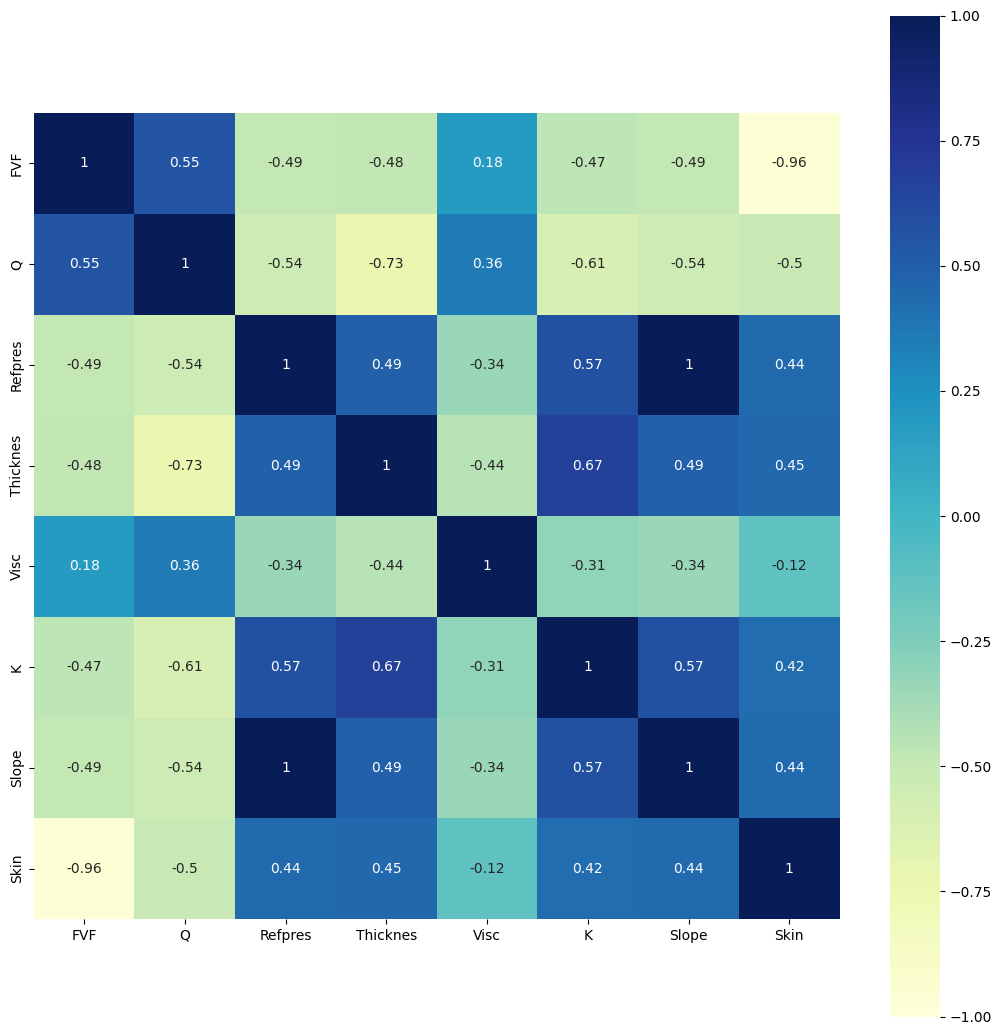

In [393]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), cmap='YlGnBu', cbar='False', vmin=-1, vmax=1, annot=True, square=True)

In [394]:
df.head()

,FVF,Q,Refpres,Thicknes,Visc,K,Slope,Skin
ID,,,,,,,,
1,1.21,2500.0000,6009.0000,23.000000,0.920000,86.631000,374.397590,0.826446
2,1.11,1842.9774,6466.8453,35.700000,0.606981,103.212750,512.302801,0.900901
3,1.01,3136.1019,5579.5585,24.592453,1.188491,70.775774,245.047741,0.990099
4,0.85,2735.8491,6978.7415,24.975472,0.708113,98.347208,666.488404,1.176471
5,1.73,3043.7358,6364.4660,29.954717,1.694151,95.103509,481.465663,0.578035


array([[<AxesSubplot: title={'center': 'FVF'}>,
        <AxesSubplot: title={'center': 'Q'}>,
        <AxesSubplot: title={'center': 'Refpres'}>],
       [<AxesSubplot: title={'center': 'Thicknes'}>,
        <AxesSubplot: title={'center': 'Visc'}>,
        <AxesSubplot: title={'center': 'K'}>],
       [<AxesSubplot: title={'center': 'Slope'}>,
        <AxesSubplot: title={'center': 'Skin'}>, <AxesSubplot: >]],
      dtype=object)

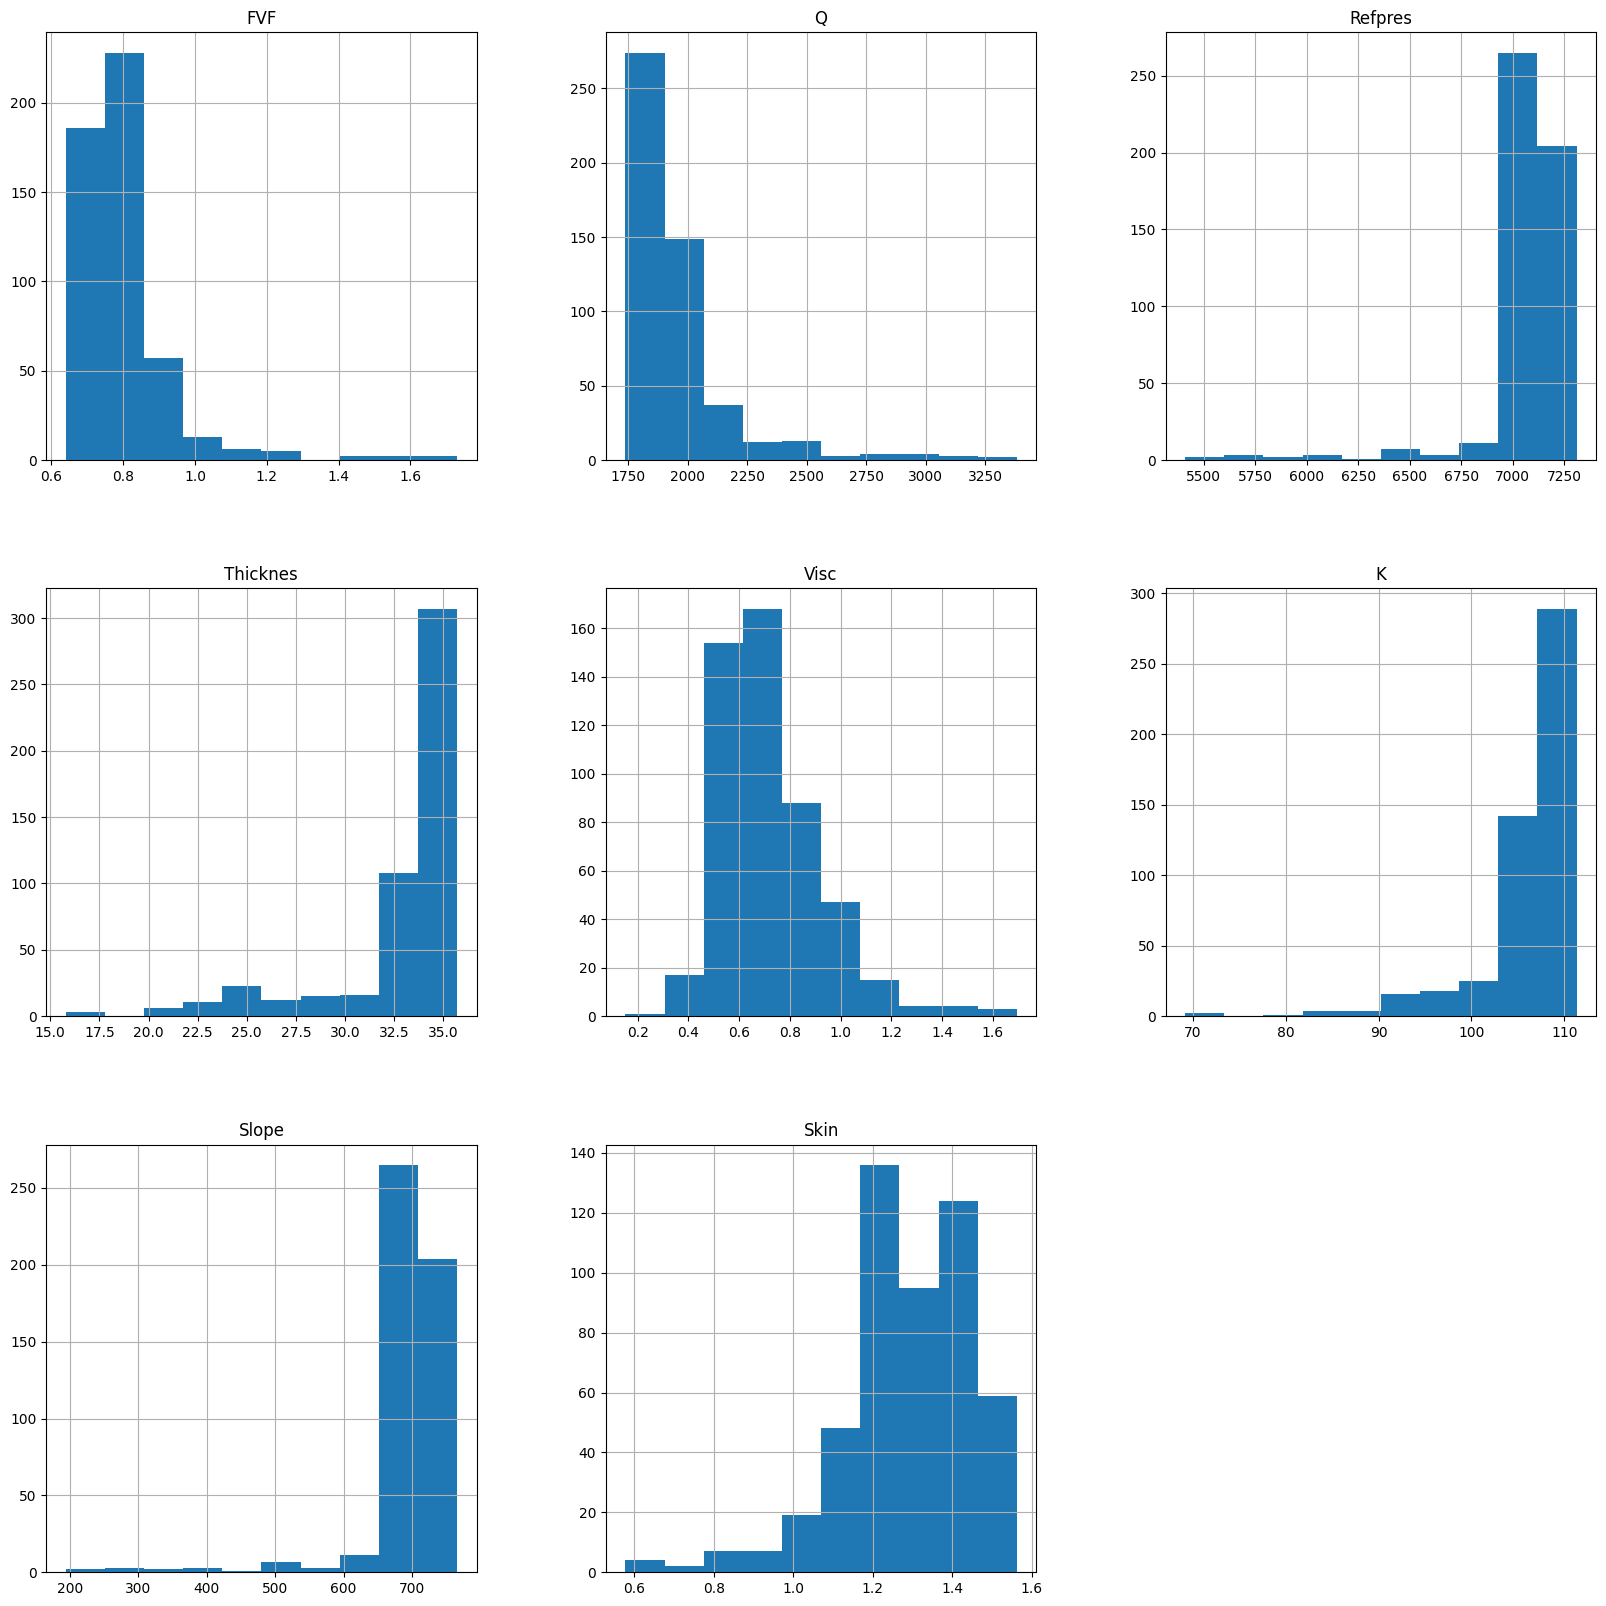

In [395]:
df.hist(figsize=(20, 20))

In [396]:
X = df.drop(columns="Skin")
y = df.Skin

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (101, 7), (400,), (101,))

In [397]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [398]:
X_train.columns

Index(['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'K', 'Slope'], dtype='object')

In [399]:
rsp.svm_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [400]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', poly =1 ), X.columns )])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_SVM = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM.fit(X_train, y_train)

print(model_SVM.best_params_)
print(model_SVM.score(X_train, y_train), model_SVM.best_score_, model_SVM.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 98.77700294007921, 'algo__gamma': 0.01879466824163846}
0.8748279960822992 0.871034292618874 0.8792867381277096


In [401]:
model_SVM.score(X_train, y_train), model_SVM.score(X_test, y_test)

(0.8748279960822992, 0.8792867381277096)

In [402]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

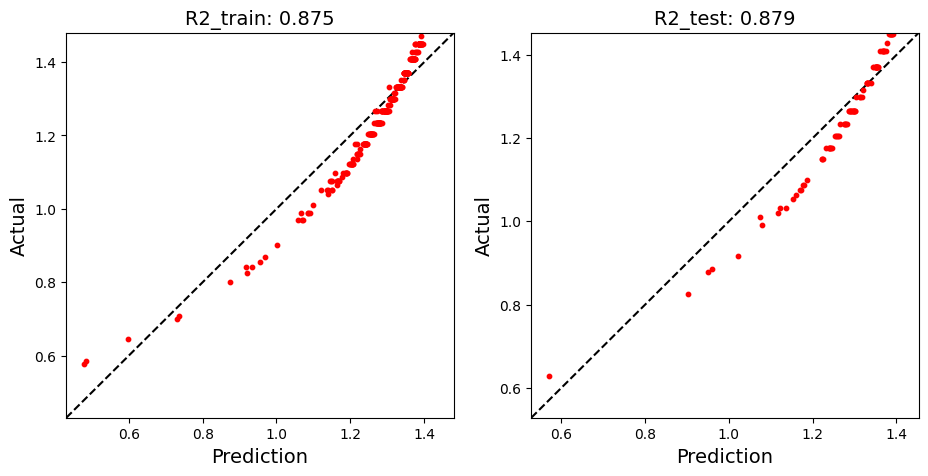

In [403]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_SVM)

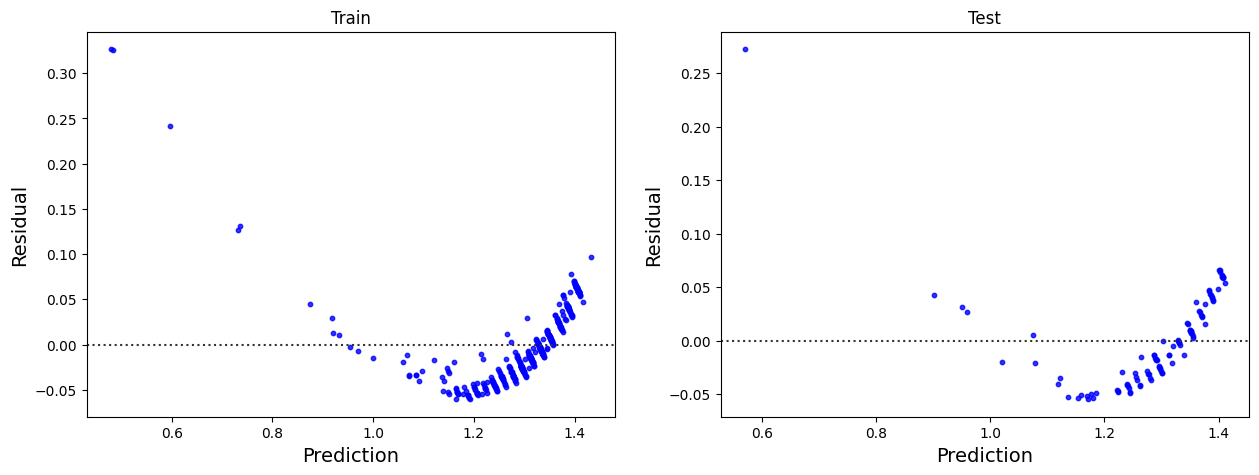

In [404]:
plot_residual(X_train, y_train, X_test, y_test, model_SVM)

In [405]:
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease

In [406]:
X_train.iloc[:1]

,FVF,Q,Refpres,Thicknes,Visc,K,Slope
ID,,,,,,,
387,0.87,1812.1887,7052.816029,33.784906,0.68283,109.839234,688.800009


In [407]:
X_pred = pd.DataFrame([[0.87, 1812.18, 7052.81, 33.78, 0.68, 109.83, 688.80]], columns=X_train.columns)
X_pred

,FVF,Q,Refpres,Thicknes,Visc,K,Slope
0,0.87,1812.18,7052.81,33.78,0.68,109.83,688.8


In [408]:
model_SVM.predict(X_pred)

array([1.22184726])

,feature,importance,stdev
0,FVF,1.382889,0.077226
1,Q,0.006037,0.001151
3,Thicknes,0.003686,0.000762
4,Visc,0.001366,0.000652
6,Slope,0.001005,0.000284
2,Refpres,0.001005,0.000284
5,K,-0.001387,0.000768


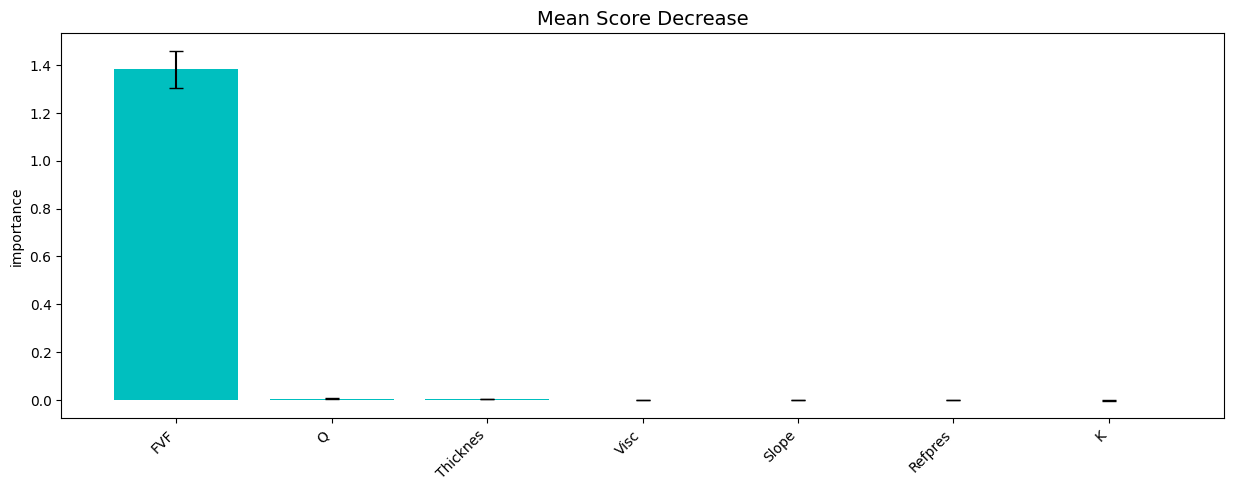

In [409]:
mean_score_decrease(X_train, y_train, model_SVM, plot = True, topk = None)

In [410]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'K', 'Slope']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_MAE = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, scoring= 'neg_mean_absolute_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MAE.fit(X_train, y_train)

print(model_MAE.best_params_)
print(model_MAE.score(X_train, y_train), model_MAE.best_score_, model_MAE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 0.001867943489455631, 'algo__gamma': 0.0895327624764271}
-0.11627020127093242 -0.11729566631007753 -0.13139059247588375


In [411]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'K', 'Slope']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_MSE = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, scoring= 'neg_mean_squared_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MSE.fit(X_train, y_train)

print(model_MSE.best_params_)
print(model_MSE.score(X_train, y_train), model_MSE.best_score_, model_MSE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 0.17670169402947963, 'algo__gamma': 506.1576888752313}
-0.010100184721305751 -0.025095672120562795 -0.028464596031078544


In [412]:
save_model(model_SVM, "Predict_Effective-Oil-Skin_s")

Model is pickled as model/Predict_Effective-Oil-Skin_s


In [413]:
K_test = model_SVM.predict(X_test)
K_train = model_SVM.predict(X_train)

In [414]:
load_model('model/Predict_Effective-Oil-Skin_s')

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'K', 'Slope'], dtype='object'))])),
                                             ('algo', SVR(max_iter=500))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algo__C': Real(low=-3, high=3, prior='log-uniform'),
                                        'algo__gamma': Real(low=-3, high=3, prior='log-uniform')},
                   random_state=42, verbose=1)

In [415]:
X_train.head()

,FVF,Q,Refpres,Thicknes,Visc,K,Slope
ID,,,,,,,
387,0.87,1812.188700,7052.816029,33.784906,0.682830,109.839234,688.800009
20,1.71,2150.864200,7012.867900,21.911321,0.758679,89.990180,676.767440
323,0.79,1842.977400,7161.552249,34.933962,0.834528,108.078300,721.551882
333,0.77,1847.538865,7119.995829,34.269806,0.581698,109.102703,709.034888
57,0.85,2274.018900,7125.594625,23.060377,1.264340,107.267380,710.721273


In [416]:
df.columns

Index(['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'K', 'Slope', 'Skin'], dtype='object')

In [417]:
input_variable_test = df.drop(columns = 'Skin')

In [418]:
input_variable_test.head()

,FVF,Q,Refpres,Thicknes,Visc,K,Slope
ID,,,,,,,
1,1.21,2500.0000,6009.0000,23.000000,0.920000,86.631000,374.397590
2,1.11,1842.9774,6466.8453,35.700000,0.606981,103.212750,512.302801
3,1.01,3136.1019,5579.5585,24.592453,1.188491,70.775774,245.047741
4,0.85,2735.8491,6978.7415,24.975472,0.708113,98.347208,666.488404
5,1.73,3043.7358,6364.4660,29.954717,1.694151,95.103509,481.465663


In [419]:
SKin_Predict_SVM = model_SVM.predict(input_variable_test)
df.insert(6, column = 'Skin_SVM', value = SKin_Predict_SVM, allow_duplicates = False)

In [420]:
df.head(20)

,FVF,Q,Refpres,Thicknes,Visc,K,Skin_SVM,Slope,Skin
ID,,,,,,,,,
1,1.21,2500.000000,6009.000000,23.000000,0.920000,86.631000,0.902076,374.397590,0.826446
2,1.11,1842.977400,6466.845300,35.700000,0.606981,103.212750,1.000603,512.302801,0.900901
3,1.01,3136.101900,5579.558500,24.592453,1.188491,70.775774,1.078798,245.047741,0.990099
4,0.85,2735.849100,6978.741500,24.975472,0.708113,98.347208,1.217326,666.488404,1.176471
5,1.73,3043.735800,6364.466000,29.954717,1.694151,95.103509,0.478503,481.465663,0.578035
6,1.15,2304.807500,6432.718900,26.507547,1.567736,101.590910,0.969316,502.023765,0.869565
7,0.75,2120.075500,6057.328300,19.996226,1.239057,107.267380,1.305572,388.954307,1.333333
8,1.25,1904.554700,5681.937700,21.528302,1.062075,94.292585,0.873705,275.884849,0.800000
9,1.55,3259.256600,5750.190600,23.443396,1.112642,104.834600,0.597485,296.442952,0.645161


In [421]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            492, 493, 494, 495, 496, 497, 498, 499, 500, 501],
           dtype='int64', name='ID', length=501)

In [422]:
df.reset_index(inplace=True)
df

,ID,FVF,Q,Refpres,Thicknes,Visc,K,Skin_SVM,Slope,Skin
0,1,1.21,2500.000000,6009.000000,23.000000,0.920000,86.631000,0.902076,374.397590,0.826446
1,2,1.11,1842.977400,6466.845300,35.700000,0.606981,103.212750,1.000603,512.302801,0.900901
2,3,1.01,3136.101900,5579.558500,24.592453,1.188491,70.775774,1.078798,245.047741,0.990099
3,4,0.85,2735.849100,6978.741500,24.975472,0.708113,98.347208,1.217326,666.488404,1.176471
4,5,1.73,3043.735800,6364.466000,29.954717,1.694151,95.103509,0.478503,481.465663,0.578035
...,...,...,...,...,...,...,...,...,...,...
496,497,0.79,1882.107190,7168.713483,34.933962,0.682830,108.238367,1.296795,723.708880,1.265823
497,498,0.75,1884.200868,7172.018055,34.706080,0.581698,108.300540,1.331595,724.704233,1.333333
498,499,0.81,1886.294546,7175.322628,34.933962,0.632264,109.700150,1.276807,725.699587,1.234568
499,500,0.79,1812.188700,7178.627200,34.550943,0.910377,105.645530,1.303701,726.694940,1.265823


In [423]:
compare = df.head(500)
compare

,ID,FVF,Q,Refpres,Thicknes,Visc,K,Skin_SVM,Slope,Skin
0,1,1.21,2500.000000,6009.000000,23.000000,0.920000,86.631000,0.902076,374.397590,0.826446
1,2,1.11,1842.977400,6466.845300,35.700000,0.606981,103.212750,1.000603,512.302801,0.900901
2,3,1.01,3136.101900,5579.558500,24.592453,1.188491,70.775774,1.078798,245.047741,0.990099
3,4,0.85,2735.849100,6978.741500,24.975472,0.708113,98.347208,1.217326,666.488404,1.176471
4,5,1.73,3043.735800,6364.466000,29.954717,1.694151,95.103509,0.478503,481.465663,0.578035
...,...,...,...,...,...,...,...,...,...,...
495,496,0.77,1880.013512,7165.408911,34.792679,0.606981,109.700150,1.312713,722.713527,1.298701
496,497,0.79,1882.107190,7168.713483,34.933962,0.682830,108.238367,1.296795,723.708880,1.265823
497,498,0.75,1884.200868,7172.018055,34.706080,0.581698,108.300540,1.331595,724.704233,1.333333
498,499,0.81,1886.294546,7175.322628,34.933962,0.632264,109.700150,1.276807,725.699587,1.234568


In [424]:
compare.to_excel("HasilTAFairuzFix.xlsx",index = False)

In [425]:
def get_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred-y_true)**2.0)) 

def get_rel_l2_error(y_true, y_pred):
    return np.linalg.norm(y_true-y_pred, 2) / np.linalg.norm(y_true, 2)

In [426]:
x1 = df.ID
y1 = df.Skin
y2 = df.Skin_SVM

Text(0, 0.5, 'Skin')

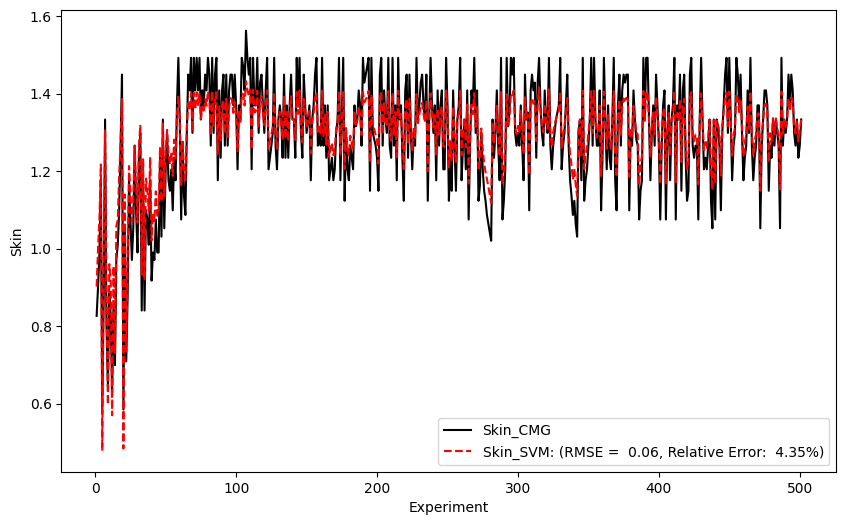

In [427]:
fig = plt.figure(figsize= (10, 6))
ax = plt.axes()

rmse_SV = get_rmse(df['Skin'], df['Skin_SVM']) 
l2_SV = get_rel_l2_error(df['Skin'], df['Skin_SVM']) * 100

ax.plot(x1, y1, 'k-', label = 'Skin_CMG')
ax.plot(x1, y2, 'r--', label = f'Skin_SVM: (RMSE = {rmse_SV: .2f}, Relative Error: {l2_SV: .2f}%)')

ax.legend()
plt.xlabel('Experiment')
plt.ylabel('Skin')